In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter("ignore", category=ConvergenceWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [65]:
df_ = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv")
df = df_.copy()
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.000,6.000,MANUAL,rear wheel drive,2.000,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.000,6.000,MANUAL,rear wheel drive,2.000,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.000,6.000,MANUAL,rear wheel drive,2.000,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.000,6.000,MANUAL,rear wheel drive,2.000,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.000,6.000,MANUAL,rear wheel drive,2.000,Luxury,Compact,Convertible,28,18,3916,34500


In [66]:
list = ["Make","Model","Year","Engine HP","Engine Cylinders","Transmission Type","Vehicle Style","highway MPG","city mpg","MSRP"]
df = df[list].fillna(0)

In [67]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.000,6.000,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.000,6.000,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.000,6.000,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.000,6.000,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.000,6.000,MANUAL,Convertible,28,18,34500


In [68]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [69]:
df.rename(columns = {"msrp":"price"}, inplace = True)
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.000,6.000,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.000,6.000,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.000,6.000,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.000,6.000,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.000,6.000,MANUAL,Convertible,28,18,34500


# Q1 : What is the most frequent observation (mode) for the column transmission_type?

In [70]:
print(f"Q1 : {df.transmission_type.mode()[0]}")

Q1 : AUTOMATIC


In [71]:
cat_cols = [col for col in df.columns if df[col].dtype == "O"]
num_cols = [col for col in df.columns if df[col].dtype != "O"]
num_cols
print(f"num_cols : {num_cols}\ncat_cols : {cat_cols}")

num_cols : ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price']
cat_cols : ['make', 'model', 'transmission_type', 'vehicle_style']


In [72]:
df_num = df[num_cols]
df_num.head()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
0,2011,335.000,6.000,26,19,46135
1,2011,300.000,6.000,28,19,40650
2,2011,300.000,6.000,28,20,36350
3,2011,230.000,6.000,28,18,29450
4,2011,230.000,6.000,28,18,34500


# Q2 : What are the two features that have the biggest correlation in this dataset?

In [73]:
df_num.corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000,0.339,-0.041,0.258,0.198,0.228
engine_hp,0.339,1.000,0.775,-0.416,-0.425,0.650
engine_cylinders,-0.041,0.775,1.000,-0.615,-0.587,0.526
highway_mpg,0.258,-0.416,-0.615,1.000,0.887,-0.160
city_mpg,0.198,-0.425,-0.587,0.887,1.000,-0.158
price,0.228,0.650,0.526,-0.160,-0.158,1.000


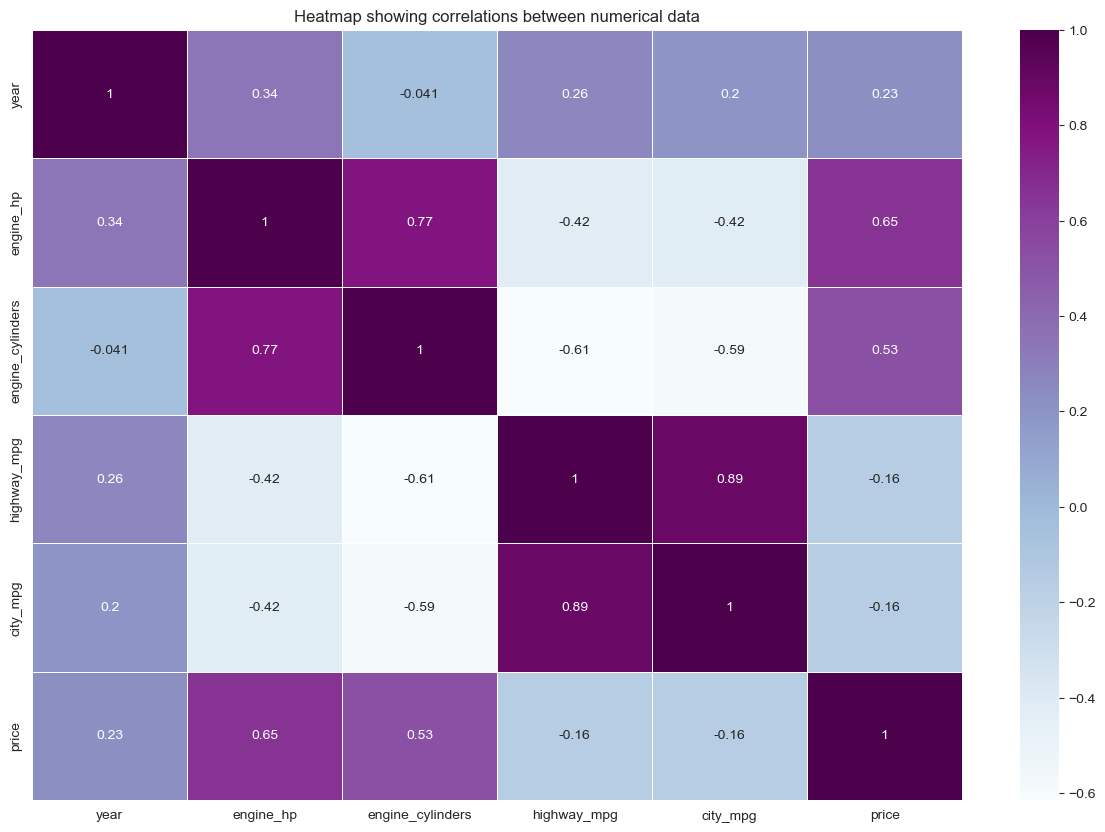

In [109]:
plt.figure(figsize=(15,10))  
sns.heatmap(df_num.corr(),annot=True,linewidths=.5, cmap="BuPu")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

In [75]:
df_num.corr().unstack().sort_values(ascending = False)[:10]

year              year               1.000
engine_hp         engine_hp          1.000
city_mpg          city_mpg           1.000
highway_mpg       highway_mpg        1.000
engine_cylinders  engine_cylinders   1.000
price             price              1.000
city_mpg          highway_mpg        0.887
highway_mpg       city_mpg           0.887
engine_hp         engine_cylinders   0.775
engine_cylinders  engine_hp          0.775
dtype: float64

In [76]:
print("Q2 : city_mpg & highway_mpg")

Q2 : city_mpg & highway_mpg


In [77]:
dff = df.copy()
mean = dff['price'].mean()

dff['above_average'] = np.where(dff['price']>=mean,1,0)

In [78]:
dff = dff.drop('price', axis=1)
dff.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,BMW,1 Series M,2011,335.000,6.000,MANUAL,Coupe,26,19,1
1,BMW,1 Series,2011,300.000,6.000,MANUAL,Convertible,28,19,1
2,BMW,1 Series,2011,300.000,6.000,MANUAL,Coupe,28,20,0
3,BMW,1 Series,2011,230.000,6.000,MANUAL,Coupe,28,18,0
4,BMW,1 Series,2011,230.000,6.000,MANUAL,Convertible,28,18,0


In [79]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   above_average      11914 non-null  int32  
dtypes: float64(2), int32(1), int64(3), object(4)
memory usage: 884.4+ KB


In [80]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(dff, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [81]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [82]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

# Q3 : Which of these variables has the lowest mutual information score?

In [83]:
from sklearn.metrics import mutual_info_score

cat = ["make", "model", "transmission_type", "vehicle_style"]

def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

df_mi = df_train[cat].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')

In [84]:
df_mi

,MI
model,0.462
make,0.240
vehicle_style,0.084
transmission_type,0.021


In [85]:
print("Q3 : transmission_type")

Q3 : transmission_type


In [86]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

In [87]:
df_train.head()
cat = [col for col in df_train.columns if df[col].dtype == "O"]
num = [col for col in df_train.columns if df[col].dtype != "O"]
print(f"num_cols : {num}\ncat_cols : {cat}")

num_cols : ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
cat_cols : ['make', 'model', 'transmission_type', 'vehicle_style']


In [88]:
train_dict = df_train[cat + num].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

# Q4 : What accuracy did you get?

In [89]:
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)

accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(f"Q4 : {accuracy}")

Q4 : 0.95


# Q5 : Which of following feature has the smallest difference?

In [90]:
features = cat + num
features

['make',
 'model',
 'transmission_type',
 'vehicle_style',
 'year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg']

In [91]:
orig_score = accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

make 0.0024548887956357124 0.9475451112043642
model 0.029731430969366257 0.9202685690306337
transmission_type 0.004133445237096023 0.9458665547629039
vehicle_style 0.017981535879143862 0.9320184641208561
year 0.0016156105749055572 0.9483843894250944
engine_hp 0.025115400755350348 0.9248845992446496
engine_cylinders 0.0028745279060008455 0.9471254720939991
highway_mpg 0.005812001678556444 0.9441879983214435
city_mpg 0.01756189676877884 0.9324381032312211


In [94]:
print(f"Q5 : Year.")

Q5 : Year.


In [96]:
df["price"]=np.log1p(df["price"])

In [97]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=42)

In [98]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [99]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [100]:
del df_train["price"]
del df_val["price"]
del df_test["price"]

# Q6 : Which of these alphas leads to the best RMSE on the validation set? (Note: If there are multiple options, select the smallest alpha.)

In [101]:
train_dict = df_train[cat + num].to_dict(orient='records')

In [102]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[cat + num].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [108]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 3))

0 0.487
0.01 0.487
0.1 0.487
1 0.487
10 0.487


In [110]:
print("Q6 : 0")

Q6 : 0
